# Second db

In [ ]:
IMG_SIZE = 480

RESIZE_SIZE = 512

import torch
from PIL import Image

In [ ]:
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
def is_in_neighbourhood(x: tuple, y: tuple, epsilon: tuple):
  for i in range(len(x)):
    if (abs(x[i] - y[i]) > epsilon[i]):
      return False
  return True

In [ ]:
import shutil
import os

save_dir = "/content/saved_knots/"
try:
  shutil.rmtree(save_dir)
except:
  pass

try:
    os.makedirs(save_dir)
except FileExistsError:
    print(f"One or more directories in '{save_dir}' already exist.")
except PermissionError:
    print(f"Permission denied: Unable to create '{save_dir}'.")
except Exception as e:
    print(f"An error occurred: {e}")

save_dir = "/content/new_knots_svg/"
try:
  shutil.rmtree(save_dir)
except:
  pass

try:
    os.makedirs(save_dir)
except FileExistsError:
    print(f"One or more directories in '{save_dir}' already exist.")
except PermissionError:
    print(f"Permission denied: Unable to create '{save_dir}'.")
except Exception as e:
    print(f"An error occurred: {e}")

save_dir = "/content/new_knots_png/"
try:
  shutil.rmtree(save_dir)
except:
  pass

try:
    os.makedirs(save_dir)
except FileExistsError:
    print(f"One or more directories in '{save_dir}' already exist.")
except PermissionError:
    print(f"Permission denied: Unable to create '{save_dir}'.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
# db from https://prideout.net/blog/svg_knots
import urllib.request
import cairosvg
from PIL import Image
import PIL.ImageOps
import numpy as np
from skimage.morphology import skeletonize
from skimage.transform import resize
from skimage.util import invert
import matplotlib.pyplot as plt
import zipfile

knots_count_1 = [1, 0, 0, 1, 1, 2, 3, 7, 21, 49, 3] # number of knots with i crossings represented on the https://prideout.net/blog/svg_knots/knottable_v1.svg

IMG_SIZE = 480 # size of the output image in px; influences on the complexity of the filling
               # 480 is size of picture from our 801-knots database so we can use that one too

FILTER_COLOR = (50, 50, 50)
TARGET_COLOR = (0, 0, 0)
BG_COLOR = (255, 255, 255)

E_BG = (10, 10, 10)
E_TARGET = (60, 60, 60)

for IMG_SIZE in [4096]:
  save_dir = "/content/new_knots_svg/"
  try:
    shutil.rmtree(save_dir)
  except:
    pass

  try:
      os.makedirs(save_dir)
  except FileExistsError:
      print(f"One or more directories in '{save_dir}' already exist.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{save_dir}'.")
  except Exception as e:
      print(f"An error occurred: {e}")

  save_dir = "/content/new_knots_png/"
  try:
    shutil.rmtree(save_dir)
  except:
    pass

  try:
      os.makedirs(save_dir)
  except FileExistsError:
      print(f"One or more directories in '{save_dir}' already exist.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{save_dir}'.")
  except Exception as e:
      print(f"An error occurred: {e}")

  for cross_num in range(len(knots_count_1)):
    for i in range(knots_count_1[cross_num]):
      url = f"https://prideout.net/blog/svg_knots/knots/{cross_num}_{i+1}.svg"
      full_path = f"/content/new_knots_svg/{cross_num}_{i+1}.svg"
      urllib.request.urlretrieve(url, full_path)

      # svg to png
      cairosvg.svg2png(bytestring=open(f"/content/new_knots_svg/{cross_num}_{i+1}.svg", 'rb').read(), write_to=f"/content/new_knots_png/{cross_num}_{i+1}.png", output_width=IMG_SIZE, output_height=IMG_SIZE)

      # fill png with white
      bg = Image.new("RGB", (IMG_SIZE, IMG_SIZE), "WHITE")
      fg = Image.open(f"/content/new_knots_png/{cross_num}_{i+1}.png")
      bg.paste(fg, (0, 0), fg)
      bg.save(f"/content/new_knots_png/{cross_num}_{i+1}.png")

      # clear the image of errors
      pixels_bg = bg.load()
      img = Image.new(bg.mode, bg.size)
      pixels = img.load()
      for x in range(IMG_SIZE):
        for y in range(IMG_SIZE):
          if is_in_neighbourhood(pixels_bg[x, y], TARGET_COLOR, E_TARGET):
            pixels[x, y] = TARGET_COLOR
          else:
            pixels[x, y] = BG_COLOR
      img.save(f"/content/new_knots_png/{cross_num}_{i+1}.png")
      img = Image.open(f"/content/new_knots_png/{cross_num}_{i+1}.png").convert('L')
      image = np.array(img)
      image = invert(image).astype(int)
      skeleton = skeletonize(image).astype(int)
      skeleton = resize(skeleton, (RESIZE_SIZE, RESIZE_SIZE))

      plt.imsave(f"/content/new_knots_png/{cross_num}_{i+1}.png", skeleton, cmap='Greys')

  with zipfile.ZipFile(f"knots_aug_{IMG_SIZE}_resized_{RESIZE_SIZE}.zip", "w") as saved_imgs_arch:
    for imgname in os.listdir("/content/new_knots_png"):
      saved_imgs_arch.write(f"/content/new_knots_png/{imgname}")

KeyboardInterrupt: 

In [ ]:
# db from https://prideout.net/blog/svg_knots
import urllib.request
import cairosvg
from PIL import Image
import PIL.ImageOps
import numpy as np
from skimage.morphology import skeletonize
from skimage.transform import resize
from skimage.util import invert
import matplotlib.pyplot as plt

knots_count_1 = [1, 0, 0, 1, 1, 2, 3, 7, 21, 49, 3] # number of knots with i crossings represented on the https://prideout.net/blog/svg_knots/knottable_v1.svg

import zipfile
import shutil

save_dir = "/content/new_knots_png/"
try:
  shutil.rmtree(save_dir)
except:
  pass

with zipfile.ZipFile(f"/content/knots_aug_4096_resized_{RESIZE_SIZE}.zip","r") as zip_ref:
      zip_ref.extractall("/content")

# structure of .zip archive (for now) is archive.zip/content/saved_knots/, so after unpacking it we get /content/content/saved_knots dir, which is not comfortable to work with,
shutil.move("/content/content/new_knots_png", "/content") # so we move it 'higher' one level
shutil.rmtree("/content/content") # and delete previous one

In [ ]:
import torchvision.transforms as transforms

def png_to_tensor(path : str =None, png_image : Image =None) -> torch.Tensor:
  if(path != None):
    png_image = Image.open(path)
  transform = transforms.PILToTensor()
  return transform(png_image)

def tensor_to_png(tensor_image) -> Image:
  transform = transforms.ToPILImage()
  return transform(tensor_image)

In [ ]:
IMG_SIZE = RESIZE_SIZE

In [ ]:
knots_count = knots_count_1.copy()

In [ ]:
# apply first transforms to "nonlinearity"
import numpy as np
import skimage as ski
from torchvision.transforms import v2
import os

fill_color = (0, 162, 232)

for file in os.listdir("/content/new_knots_png"):
  img = Image.open(f"/content/new_knots_png/{file}").convert('L')
  pixels = img.load()
  for x in range(IMG_SIZE):
    for y in range(IMG_SIZE):
      if pixels[x, y] < 225:
        pixels[x, y] = 0
      else:
        pixels[x, y] = 255

  img.convert('RGB').save(f"/content/new_knots_png/{file}")

  img = png_to_tensor(f"/content/new_knots_png/{file}")
  perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0, fill=fill_color)
  img = perspective_transformer(img)
  tensor_to_png(img).convert("RGB").save(f"/content/new_knots_png/{file}")

  img = Image.open(f"/content/new_knots_png/{file}").convert('RGB')
  pixels = img.load()
  border = []
  for i in range(IMG_SIZE):
    border.append((0, i))
    border.append((i, 0))

  for x in range(1, IMG_SIZE-1):
    for y in range(1, IMG_SIZE-1):
      if (pixels[x-1, y-1] != fill_color or pixels[x-1, y] != fill_color or pixels[x-1, y+1] != fill_color or
         pixels[x, y-1] != fill_color or pixels[x, y+1] != fill_color or
         pixels[x+1, y-1] != fill_color or pixels[x+1, y] != fill_color or pixels[x+1, y+1] != fill_color) and pixels[x, y] == fill_color:
        border.append((x, y))

  for (x, y) in border:
    for c1 in range(-1, 2, 1):
      for c2 in range(-1, 2, 1):
        if (x+c1 >= 0 and x+c1 < IMG_SIZE) and (y+c2 >= 0 and y+c2 < IMG_SIZE):
          pixels[x+c1, y+c2] = fill_color

  for x in range(IMG_SIZE):
    for y in range(IMG_SIZE):
      if pixels[x, y] == fill_color:
        pixels[x, y] = (255, 255, 255)

  img.convert('RGB').save(f"/content/new_knots_png/{file}")

In [ ]:
# apply transforms to them!
import math
import random

# numbers of available transformations
k = 3

# max number of times of transforms
MAX_N = max(knots_count) # n(0) = max; N(0) = 1; n(11) = 1; N(11) = knots_count[11] => from formula obtain MAX_N = knots_count[11]; prev was 2**k

def save_transforms(filename, orig_dir):
  try:
    orig_img = png_to_tensor(path=orig_dir + filename + ".png")
  except Exception as e:
    print(f"Error: {e}")
    return

  # see https://pytorch.org/vision/0.20/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py

  # random rotation
  rotater = v2.RandomRotation(degrees=(0, 180), expand=False, fill=255)

  # horizontal flip
  hflipper = v2.RandomHorizontalFlip(p=1)

  # vertical flip
  vflipper = v2.RandomVerticalFlip(p=1)

  list_of_transforms = torch.nn.ModuleList([rotater, hflipper, vflipper])

  # create and save the results
  save_dir = f"/content/saved_knots/{filename.split('_')[0]}"
  try:
      os.makedirs(save_dir)
  except FileExistsError:
      print(f"One or more directories in '{save_dir}' already exist.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{save_dir}'.")
      return
  except Exception as e:
      print(f"An error occurred: {e}")
      return

  # uniformly distributed transformations

  # variables
  m = int(filename.split('_')[0])
  N = knots_count[m]
  n = max(1, round(MAX_N/N))
  s = [0]*k
  in_s = []
  a = [math.ceil(n/2)]*k
  b = [math.floor(n/2)]*k

  for i in range(n):
    # set bits of s
    for j in range(k):
      rand_choice = random.randint(1, a[j]+b[j])
      if rand_choice <= a[j]:
        s[j] = 0
        a[j] -= 1
      else:
        s[j] = 1
        b[j] -= 1
    in_s.append(int(''.join(str(j) for j in s), 2))

    cur_img = orig_img
    # for clarity of the image
    if(s[0] or s[2]):
      if(s[0]): cur_img = list_of_transforms[0](cur_img)
      if(s[2]): cur_img = list_of_transforms[2](cur_img)

    for j in range(1, k):
      if s[j] and j != 2:
        cur_img = list_of_transforms[j](cur_img)

    tensor_to_png(cur_img).convert('L').save(save_dir + f"/{len(os.listdir(save_dir))}.png", "png")
    saved_imgs.append(save_dir + f"/{len(os.listdir(save_dir))-1}.png")

In [ ]:
directory = os.fsencode("/content/new_knots_png")

# set -{number of knots you want to transform}
N = 1

saved_imgs = []

# aka for knot_image in knots: save transforms of image
for file in os.listdir(directory):
    if(not N): break; N += 1
    filename = os.path.splitext(os.fsdecode(file))[0]
    save_transforms(str(filename), "/content/new_knots_png/")

In [ ]:
for dir in os.listdir("/content/saved_knots"):
  num = len(os.listdir(f"/content/saved_knots/{dir}"))
  for file_num in range(num):
    filename = f"{file_num}.png"
    for i in range(1, 21, 1):
      img = v2.Resize((IMG_SIZE-2*i, IMG_SIZE-2*i))(png_to_tensor(f"/content/saved_knots/{dir}/{filename}"))
      img = v2.Pad(padding=i, fill=255)(img)
      tensor_to_png(img).convert('L').save(f"/content/saved_knots/{dir}/{num - 1 + file_num*20 + i}.png", "png")
      saved_imgs.append(f"/content/saved_knots/{dir}/{num - 1 + file_num*20 + i}.png")

In [ ]:
import zipfile

# save all to the .zip file
with zipfile.ZipFile(f"knots_{IMG_SIZE}.zip", "w") as saved_imgs_arch:
    for imgname in saved_imgs:
      saved_imgs_arch.write(imgname)

# Networks

You can start this section by uploading previously zip archive in /content

## Preparation

### Data

In [ ]:
# extract .zip
import zipfile
import shutil # deletes /content/content directory
import glob # searches for .zip files

try:
  shutil.rmtree("/content/saved_knots")
except Exception as e:
  pass

# get all .zip files from local storage
files = glob.glob('*.zip')

# if 2 or more files occured, we don't know which we want to extract
if len(files) > 1:
  print("Don't know which archive to unpack")
else:
  # unpack .zip
  with zipfile.ZipFile(f"/content/{files[0]}","r") as zip_ref:
      zip_ref.extractall("/content")

  # structure of .zip archive (for now) is archive.zip/content/saved_knots/, so after unpacking it we get /content/content/saved_knots dir, which is not comfortable to work with,
  shutil.move("/content/content/saved_knots", "/content/saved_knots") # so we move it 'higher' one level
  shutil.rmtree("/content/content") # and delete previous one

In [ ]:
import torch
from PIL import Image
import tqdm
from tqdm.notebook import tqdm as tqdmn

In [ ]:
from torchvision.datasets import VisionDataset
import os
import os.path
import sys

IMG_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')

def has_file_allowed_extension(filename, extensions):
  return filename.lower().endswith(extensions)


def is_image_file(filename):
  return has_file_allowed_extension(filename, IMG_EXTENSIONS)


def make_dataset(dir, class_to_idx, extensions=None, is_valid_file=None):
  images = []
  dir = os.path.expanduser(dir)
  if not ((extensions is None) ^ (is_valid_file is None)):
    raise ValueError("Both extensions and is_valid_file cannot be None or not None at the same time")
  if extensions is not None:
    def is_valid_file(x):
      return has_file_allowed_extension(x, extensions)
  for target in sorted(class_to_idx.keys()):
    d = os.path.join(dir, target)
    if not os.path.isdir(d):
      continue
    for root, _, fnames in sorted(os.walk(d)):
      for fname in sorted(fnames):
        path = os.path.join(root, fname)
        if is_valid_file(path):
          item = (path, class_to_idx[target])
          images.append(item)

  return images

def pil_loader(path):
  with open(path, 'rb') as f:
    img = Image.open(f)
    return img.convert('RGB')

class CustomDatasetFolder(VisionDataset):
  def __init__(self, root, loader, extensions=None, transform=None,
               target_transform=None, is_valid_file=None):
    super().__init__(root, transform=transform,
                     target_transform=target_transform)
    classes, class_to_idx = self._find_classes(self.root)
    samples = make_dataset(self.root, class_to_idx, extensions, is_valid_file)
    if len(samples) == 0:
        raise (RuntimeError("Found 0 files in subfolders of: " + self.root + "\n"
                            "Supported extensions are: " + ",".join(extensions)))

    self.loader = loader
    self.extensions = extensions

    self.classes = classes
    self.class_to_idx = class_to_idx
    self.samples = samples
    self.targets = [s[1] for s in samples]

  def _find_classes(self, dir):
    if sys.version_info >= (3, 5):
        # Faster and available in Python 3.5 and above
        classes = [d.name for d in os.scandir(dir) if d.is_dir()]
    else:
        classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()

    classes = [int(i) for i in classes]
    classes = [str(i) for i in range(0, max(classes)+1)]

    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

  def __getitem__(self, index):
    path, target = self.samples[index]
    sample = self.loader(path)
    if self.transform is not None:
        sample = self.transform(sample)
    if self.target_transform is not None:
        target = self.target_transform(target)

    return sample, target

  def __len__(self):
    return len(self.samples)

class CustomImageFolder(CustomDatasetFolder):
  def __init__(self, root, transform=None, target_transform=None,
               loader=pil_loader, is_valid_file=None):
    super().__init__(root, loader, IMG_EXTENSIONS if is_valid_file is None else None,
                                          transform=transform,
                                          target_transform=target_transform,
                                          is_valid_file=is_valid_file)
    self.imgs = self.samples

In [ ]:
# we use torchvision.datasets.ImageFolder class to divide our data into classes and work with them efficiently
# useful links: https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
#
#               https://debuggercafe.com/pytorch-imagefolder-for-training-cnn-models/

import torchvision
from torchvision.transforms import v2
data_transform = v2.Compose([v2.Grayscale(num_output_channels=1),
                             v2.ToImage(),
                             v2.ToDtype(torch.float32, scale=True),
                             v2.functional.invert])

data = CustomImageFolder(root='/content/saved_knots',
                         transform=data_transform)

In [ ]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [ ]:
type(data)

__main__.CustomImageFolder

In [ ]:
# shape of the element of the data array
image = data[0][0]
image.shape

torch.Size([1, 512, 512])

In [ ]:
IMG_SIZE = image.shape[1]

IMG_SIZE

512

In [ ]:
# split data into train and test sets
k = 0.8 # train/all ratio
train_len = int(k*len(data))
train_data, test_data = torch.utils.data.random_split(data, [train_len, len(data)-train_len])

In [ ]:
from torch.utils.data import DataLoader # iterable class; https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 64

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True, # shuffle data every epoch?
    num_workers=2,
    pin_memory=True
)

test_dataloader = DataLoader(test_data,
                             num_workers=2,
                             pin_memory=True)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e97c7f01150>, <torch.utils.data.dataloader.DataLoader object at 0x7e97c7eb5bd0>)
Length of train dataloader: 114 batches of 64
Length of test dataloader: 1811


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 1, 512, 512]), torch.Size([64]))

In [ ]:
train_data[0]

(Image([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], ),
 8)

Image size: torch.Size([1, 512, 512])
Label: 9, label size: torch.Size([])
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


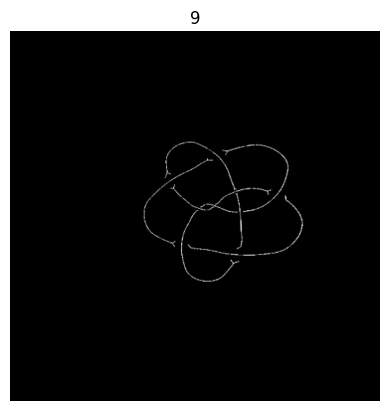

In [ ]:
# show a sample
import matplotlib.pyplot as plt

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(data.classes[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")
print(data.classes)

In [ ]:
# device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu" # cuda is MUCH faster
device

'cuda'

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


### Functions for models

In [ ]:
# aka training loop
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    y_pred_train, y_target_train = [], []
    for (X, y) in data_loader:
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).squeeze(dim=1)

        for i in y_pred.tolist():
          y_pred_train.append(round(i))
        for i in y.tolist():
          y_target_train.append(round(i))

        # 2. Calculate loss
        loss = loss_fn(y_pred, y.type(torch.float32))
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.round()) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"\nTrain loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return y_pred_train, y_target_train, train_loss.cpu().detach().numpy(), train_acc

# aka testing loop
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              threshold: float = 0.001,
              device: torch.device = device,
              scheduler: torch.optim.lr_scheduler = None,
              save_path: str = None):
    test_loss, test_acc = 0, 0
    y_pred_test, y_target_test = [], []
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X).squeeze(dim=1)

            for i in test_pred.tolist():
              y_pred_test.append(round(i))
            for i in y.tolist():
              y_target_test.append(round(i))

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y.type(torch.float32))
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.round() # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        if scheduler != None:
          scheduler.step(test_loss)

        if test_acc > best_acc:
          best_fold = fold
          if save_path != None:
            torch.save(model.state_dict(), save_path + f'{model.__class__.__name__}_best.pth')

        print(f"\nTest loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
        return y_pred_test, y_target_test, test_loss.cpu().detach().numpy(), test_acc

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X).squeeze(dim=1)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.round())

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

### Functions for plotting

In [ ]:
te = torch.Tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.],
                   [1., 2., 3., 4., 5., 6., 7., 8., 9.],
                   [1., 2., 3., 4., 5., 6., 7., 8., 9.]])

te = torch.sum(te, dim=0)

siz_te = int(te.shape[0]**(1/2))

te = torch.unflatten(te, dim=0, sizes=(siz_te, siz_te))

te, siz_te

(tensor([[ 3.,  6.,  9.],
         [12., 15., 18.],
         [21., 24., 27.]]),
 3)

In [ ]:
def plot_weights(layers: list):
  fig, axs = plt.subplots(ncols=1, nrows=len(layers), figsize=(7, 7*len(layers)))
  for i, layer in enumerate(layers):
    if type(layer) == torch.nn.modules.linear.Linear:
      weight = torch.sum(layer.weight, dim=0)
      siz = int(weight.shape[0]**(1/2))
      weight = torch.unflatten(weight, dim=0, sizes=(siz, siz))
    elif type(layer) == torch.nn.modules.conv.Conv2d:
      weight = torch.sum(torch.sum(layer.weight, dim=0), dim=0)
    axs[i].imshow(weight.cpu().detach().numpy())

In [ ]:
def plot_weights_image(layers: list, func_length: int, img: torch.Tensor):
  fig, axs = plt.subplots(ncols=2, nrows=func_length, figsize=(2*7, 7*func_length))
  i = -1
  for layer in layers:
    img = img.cpu()
    #print(type(layer), img.shape)
    if type(layer) == torch.nn.modules.linear.Linear:
      i += 1
      # how much does image activate each neuron
      img = img.squeeze()
      if torch.Tensor.dim(img) == 1:
        siz = int(img.shape[0]**(1/2))
        img = torch.unflatten(img, dim=0, sizes=(siz, siz))

      weight = torch.sum(layer.weight, dim=0).cpu()
      siz = int(weight.shape[0]**(1/2))
      weight = torch.unflatten(weight, dim=0, sizes=(siz, siz))
      mult = torch.mul(weight.cpu(), img.cpu()).cpu()
      axs[i][0].imshow(mult.detach().numpy())

      # output
      img = torch.flatten(img).unsqueeze(dim=0)
      img = layer(img.cuda()).cpu()

      siz = int(img.shape[1]**(1/2))
      img = torch.unflatten(img, dim=1, sizes=(siz, siz))

      axs[i][1].imshow(img.squeeze(dim=0).detach().numpy())

    elif type(layer) == torch.nn.modules.conv.Conv2d:
      i += 1
      weight = torch.sum(torch.sum(layer.weight, dim=0), dim=0)
      axs[i][0].imshow(weight.cpu().detach().numpy())

      img = layer(img.cuda()).cpu()

      img_show = torch.sum(img, dim=0)

      axs[i][1].imshow(img_show.squeeze(dim=0).detach().numpy())
    elif type(layer) == torch.nn.modules.flatten.Flatten:
      img = layer(img.unsqueeze(dim=0).cuda()).squeeze().cpu()
    elif type(layer) == torch.nn.modules.batchnorm.BatchNorm1d or type(layer) == torch.nn.modules.batchnorm.BatchNorm2d:
      pass
    else:
      img = layer(img.cuda()).cpu()

## Vanila

### Building a model

In [ ]:
from torch import nn

# Create a model with non-linear and linear layers
class KnotsModelVanila(nn.Module):
    def __init__(self, input_shape: int, hidden_units_1: int, hidden_units_2: int, hidden_units_3:int, hidden_units_4: int, output_shape: int): # try to change the number of hidden layers
        super().__init__()
        self.dropout = nn.Dropout(p=0.9)

        self.layer_prepare = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(input_shape)
        )
        self.layer_1 = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units_1),
            nn.ELU(),
            nn.BatchNorm1d(hidden_units_1)
        )
        self.layer_2 = nn.Sequential(
            nn.Linear(in_features=hidden_units_1, out_features=hidden_units_2),
            nn.ELU(),
            nn.BatchNorm1d(hidden_units_2)
        )
        self.layer_3 = nn.Sequential(
            nn.Linear(in_features=hidden_units_2, out_features=hidden_units_3),
            nn.ELU(),
            nn.BatchNorm1d(hidden_units_3)
        )
        self.layer_4 = nn.Sequential(
            nn.Linear(in_features=hidden_units_3, out_features=hidden_units_4),
            nn.ELU()
        )
        self.layer_5 = nn.Sequential(
            nn.Linear(in_features=hidden_units_4, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
      x = self.layer_prepare(x)
      #x = self.dropout(x)
      x = self.layer_1(x)
      #x = self.dropout(x)
      x = self.layer_2(x)
      #x = self.dropout(x)
      x = self.layer_3(x)
      #x = self.dropout(x)
      x = self.layer_4(x)
      x = self.dropout(x)
      x = self.layer_5(x)
      return x

In [ ]:
# let's try our model
from sklearn.model_selection import KFold #https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-pytorch.md
from torch.utils.data import SubsetRandomSampler
from helper_functions import accuracy_fn

EPOCHS = 20
BATCH_SIZE = 64
N_SPLITS = 5
best_acc = 0
best_fold = 0
SAVE_PATH = 'content/saved_models'

try:
  os.mkdir(SAVE_PATH)
except:
  pass

train_losses, train_accuracies = [[] for i in range(N_SPLITS)], [[] for i in range(N_SPLITS)]
valid_losses, valid_accuracies = [[] for i in range(N_SPLITS)], [[] for i in range(N_SPLITS)]

y_pred_train, y_target_train = [[] for i in range(N_SPLITS)], [[] for i in range(N_SPLITS)]
y_pred_valid, y_target_valid = [[] for i in range(N_SPLITS)], [[] for i in range(N_SPLITS)]

kfold = KFold(n_splits=N_SPLITS, shuffle=True)

for fold, (train_idx, valid_idx) in tqdm.notebook.tqdm(enumerate(kfold.split(data))):
  print(f'Fold {fold+1}')
  print('--------------')

  train_dataloader = DataLoader(dataset=data,
                                batch_size=BATCH_SIZE,
                                sampler=SubsetRandomSampler(train_idx))

  valid_dataloader = DataLoader(dataset=data,
                                batch_size=BATCH_SIZE,
                                sampler=SubsetRandomSampler(valid_idx))


  model_1 = KnotsModelVanila(input_shape=IMG_SIZE**2,
                             hidden_units_1=22**2,
                             hidden_units_2=24**2,
                             hidden_units_3=14**2,
                             hidden_units_4=7**2,
                             output_shape=1
                            ).to(device)
  loss_fn = nn.MSELoss()
  optimizer = torch.optim.Adam(params=model_1.parameters(),
                               lr=0.0003,
                               weight_decay=0.0001)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                         mode='min',
                                                         factor=0.2,
                                                         patience=3,
                                                         threshold=0.001,
                                                         verbose=True)

  for epoch in tqdm.tqdm(range(EPOCHS)):
    print(f'\nEpoch: {epoch+1}')

    y_pred_train_fold, y_target_train_fold, train_loss, train_acc = train_step(data_loader=train_dataloader,
                                                                               model=model_1,
                                                                               loss_fn=loss_fn,
                                                                               optimizer=optimizer,
                                                                               accuracy_fn=accuracy_fn,
                                                                              )
    y_pred_train[fold] = y_pred_train_fold; y_target_train[fold] = y_target_train_fold
    train_losses[fold].append(train_loss); train_accuracies[fold].append(train_acc)

    y_pred_valid_fold, y_target_valid_fold, valid_loss, valid_acc = test_step(data_loader=valid_dataloader,
                                                                              model=model_1,
                                                                              loss_fn=loss_fn,
                                                                              accuracy_fn=accuracy_fn,
                                                                              scheduler=scheduler,
                                                                              save_path=SAVE_PATH
                                                                             )
    y_pred_valid[fold] = y_pred_valid_fold; y_target_valid[fold] = y_target_valid_fold
    valid_losses[fold].append(valid_loss); valid_accuracies[fold].append(valid_acc)

0it [00:00, ?it/s]

Fold 1
--------------


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

  0%|          | 0/20 [00:00<?, ?it/s]


Epoch: 1


  0%|          | 0/20 [00:23<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
model_1 = KnotsModelVanila(input_shape=IMG_SIZE**2,
                          hidden_units_1=22**2,
                          hidden_units_2=24**2,
                          hidden_units_3=14**2,
                          hidden_units_4=7**2,
                          output_shape=1
                        ).to(device)

model_1.load_state_dict(torch.load(SAVE_PATH + f'{model_1.__class__.__name__}_best.pth', weights_only=True))

In [ ]:
train_losses = train_losses[fold]; train_accuracies = train_accuracies[fold]
valid_losses = valid_losses[fold]; valid_accuracies = valid_accuracies[fold]
y_pred_train = y_pred_train[fold]; y_target_train = y_target_train[fold]
y_pred_valid = y_pred_valid[fold]; y_target_valid = y_target_valid[fold]

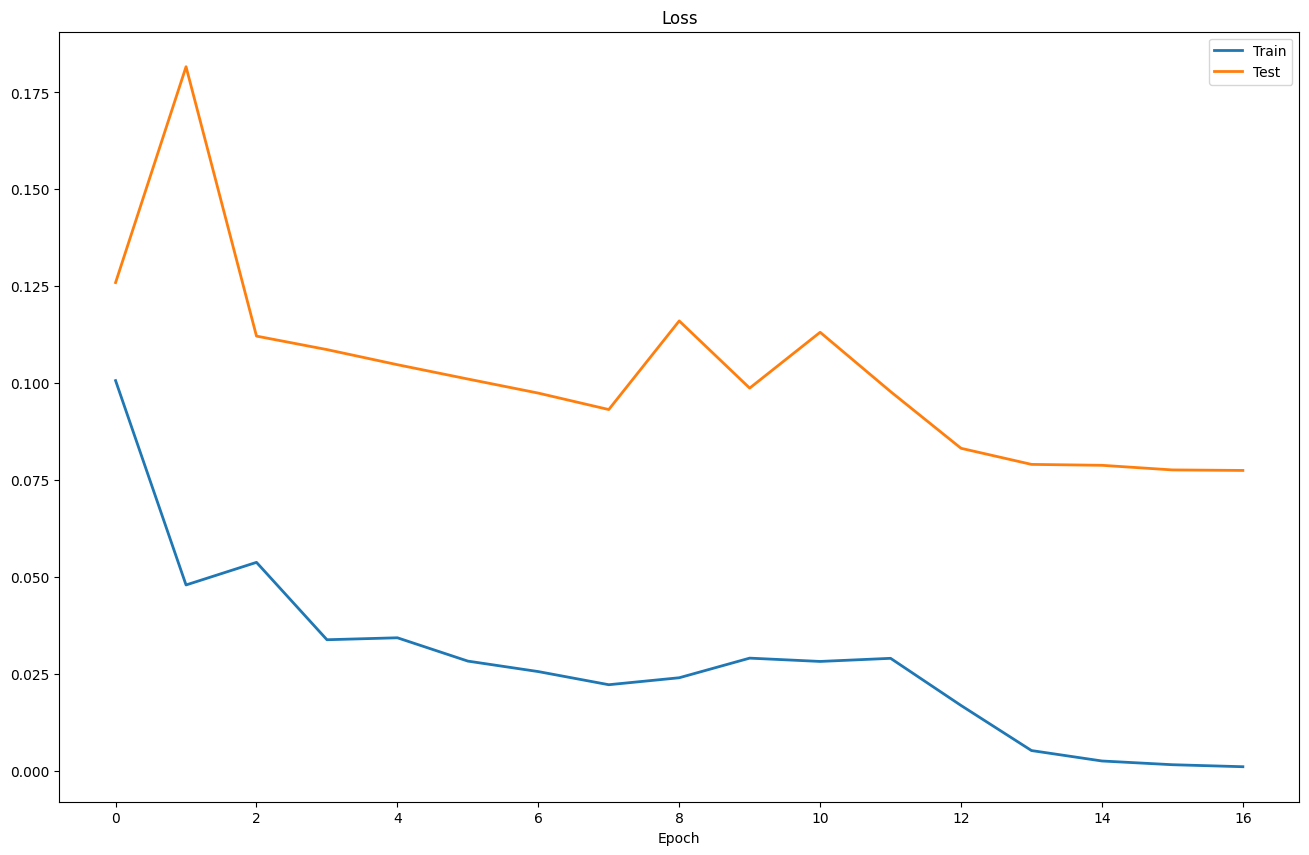

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.title(f"Loss on {folder+1}th folder")

plt.plot(range(EPOCHS-3), train_losses[3:], label="Train", linewidth=2)
plt.plot(range(EPOCHS-3), valid_losses[3:], label="Validation", linewidth=2)

plt.legend()
plt.xlabel("Epoch")
plt.show()

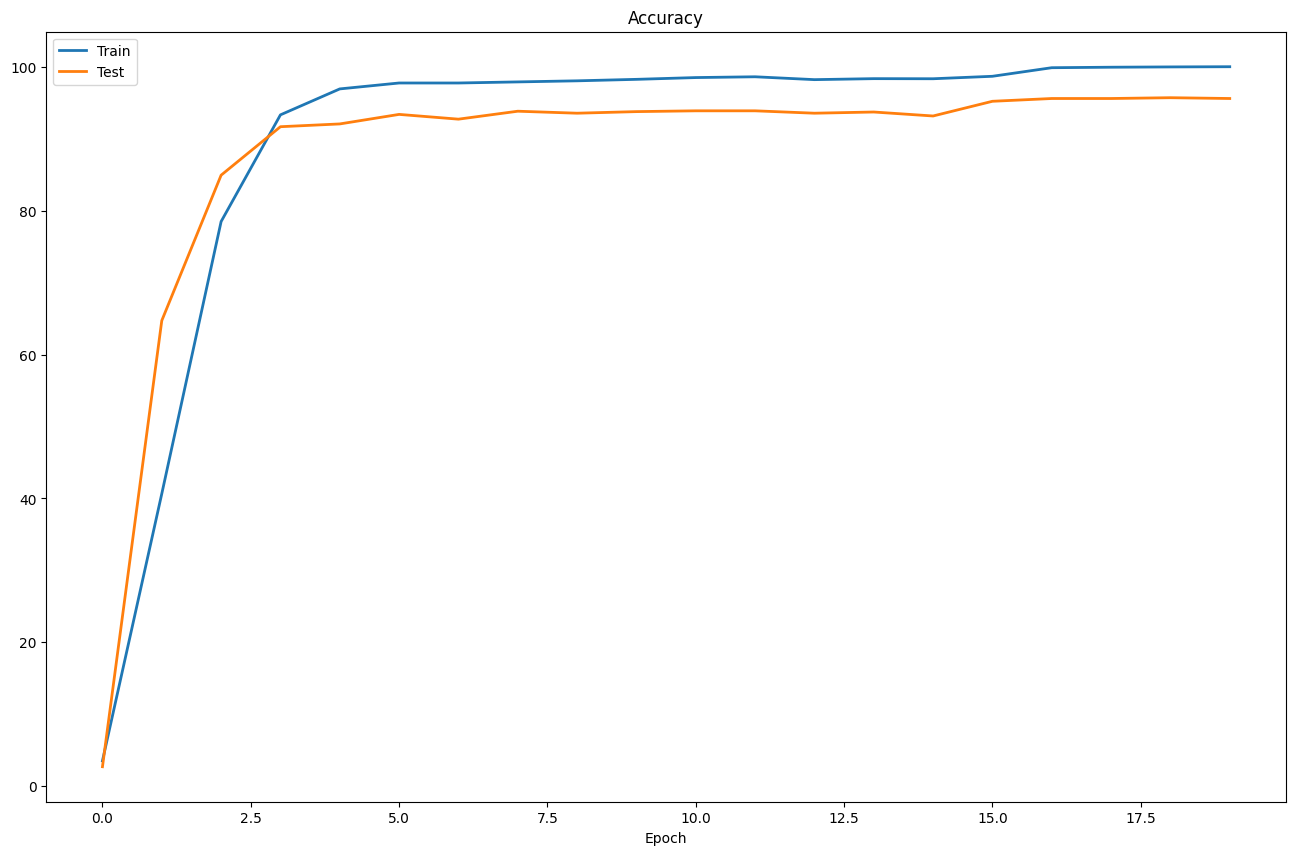

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.title("Accuracy")

plt.plot(range(epochs), train_accuracies, label="Train", linewidth=2)
plt.plot(range(epochs), valid_accuracies, label="Test", linewidth=2)

plt.legend()
plt.xlabel("Epoch")
plt.show()

### Plotting confusion matrixes

In [ ]:
import sklearn.metrics

In [ ]:
conf_matrix_train = sklearn.metrics.confusion_matrix(y_target_train, y_pred_train, labels=list(range(0, len(data.classes))))

conf_matrix_train

array([[826,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 828,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 799,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 817,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 803,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 826,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 703,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 825,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 813]])

In [ ]:
conf_matrix_test = sklearn.metrics.confusion_matrix(y_target_valid, y_pred_valid, labels=list(range(0, len(data.classes))))

conf_matrix_valid

array([[197,   5,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3, 180,  14,   3,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0, 229,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 191,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 192,   8,   1,   2,   1],
       [  0,   0,   0,   0,   0,   0,   1, 200,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2, 176,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  14, 190,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  15, 177]])

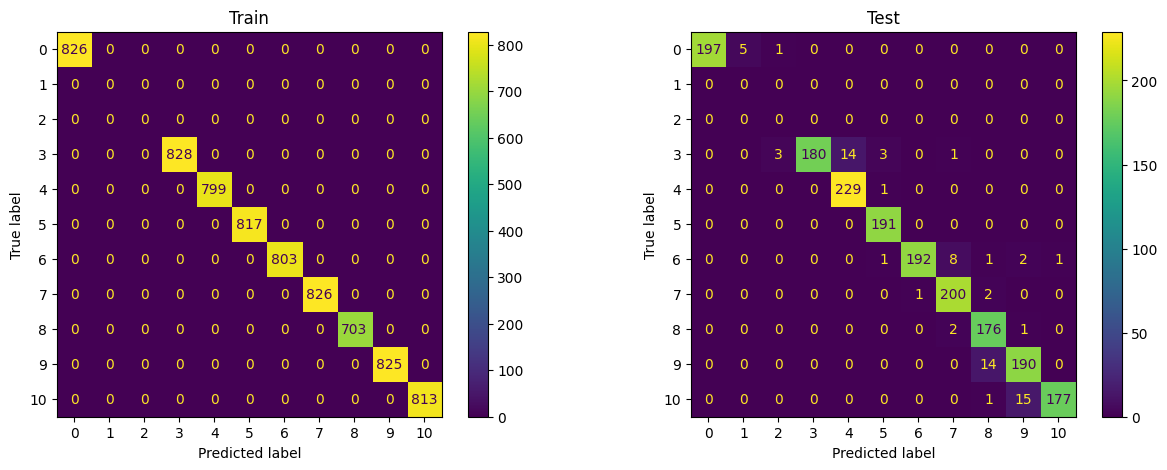

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.set_title("Train")
ax2.set_title("Validation")

sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train).plot(ax=ax1)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_valid).plot(ax=ax2)

### Weights

In [ ]:
model_1

KnotsModelVanila(
  (dropout): Dropout(p=0.9, inplace=False)
  (layer_prepare): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): BatchNorm1d(262144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer_1): Sequential(
    (0): Linear(in_features=262144, out_features=484, bias=True)
    (1): ELU(alpha=1.0)
    (2): BatchNorm1d(484, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer_2): Sequential(
    (0): Linear(in_features=484, out_features=576, bias=True)
    (1): ELU(alpha=1.0)
    (2): BatchNorm1d(576, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer_3): Sequential(
    (0): Linear(in_features=576, out_features=196, bias=True)
    (1): ELU(alpha=1.0)
    (2): BatchNorm1d(196, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer_4): Sequential(
    (0): Linear(in_features=196, out_features=49, bias=True)
    (1): ELU(alpha=1.0)
  )
  (layer_5): Sequential(
    (0): Lin

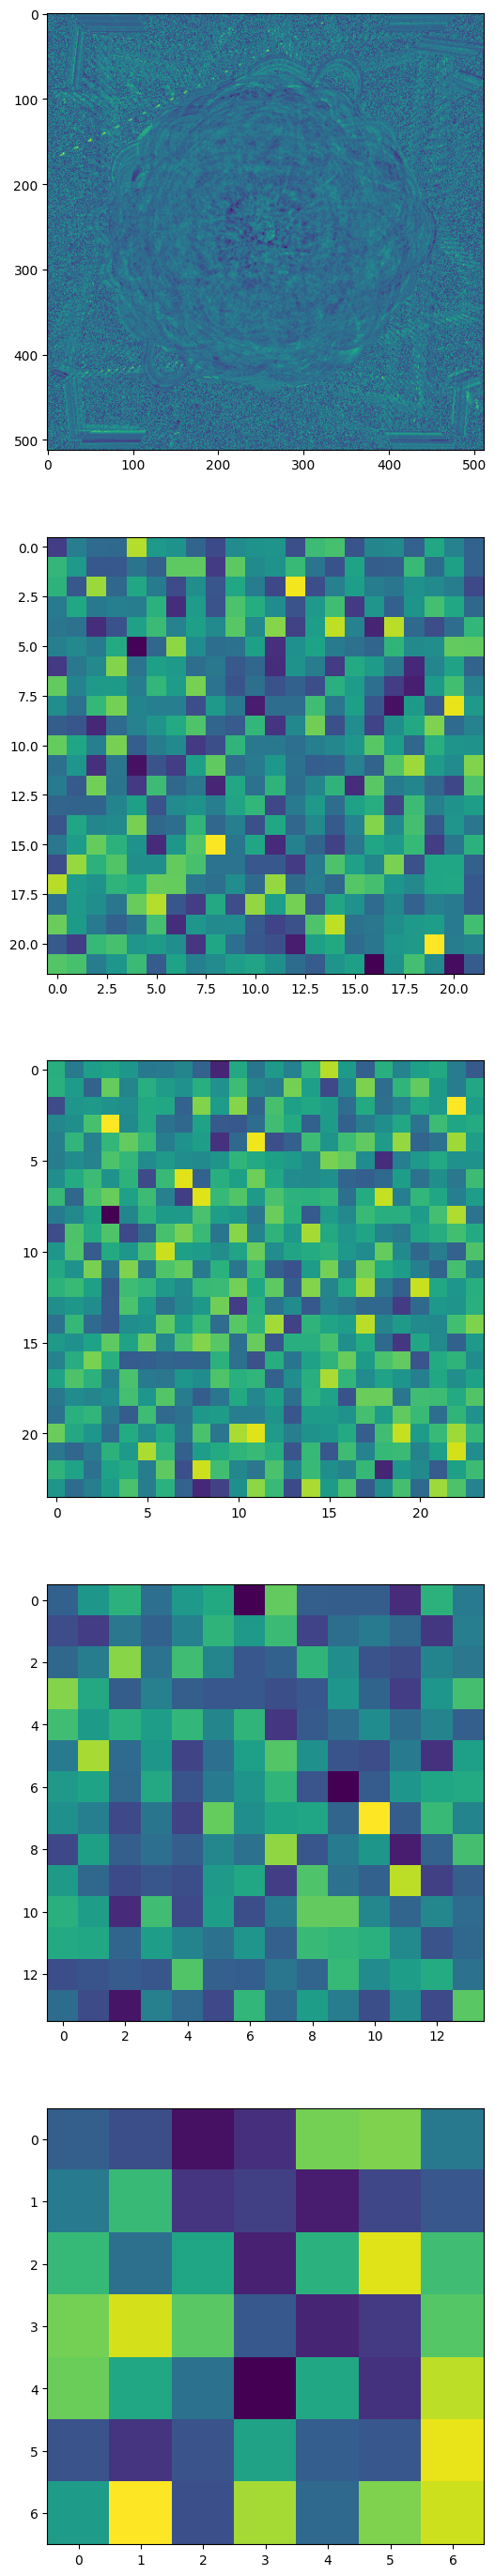

In [ ]:
plot_weights([model_1.layer_1[0], model_1.layer_2[0], model_1.layer_3[0], model_1.layer_4[0], model_1.layer_5[0]])

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

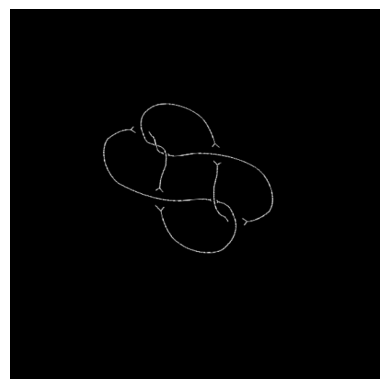

In [ ]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img = train_features_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("Off")

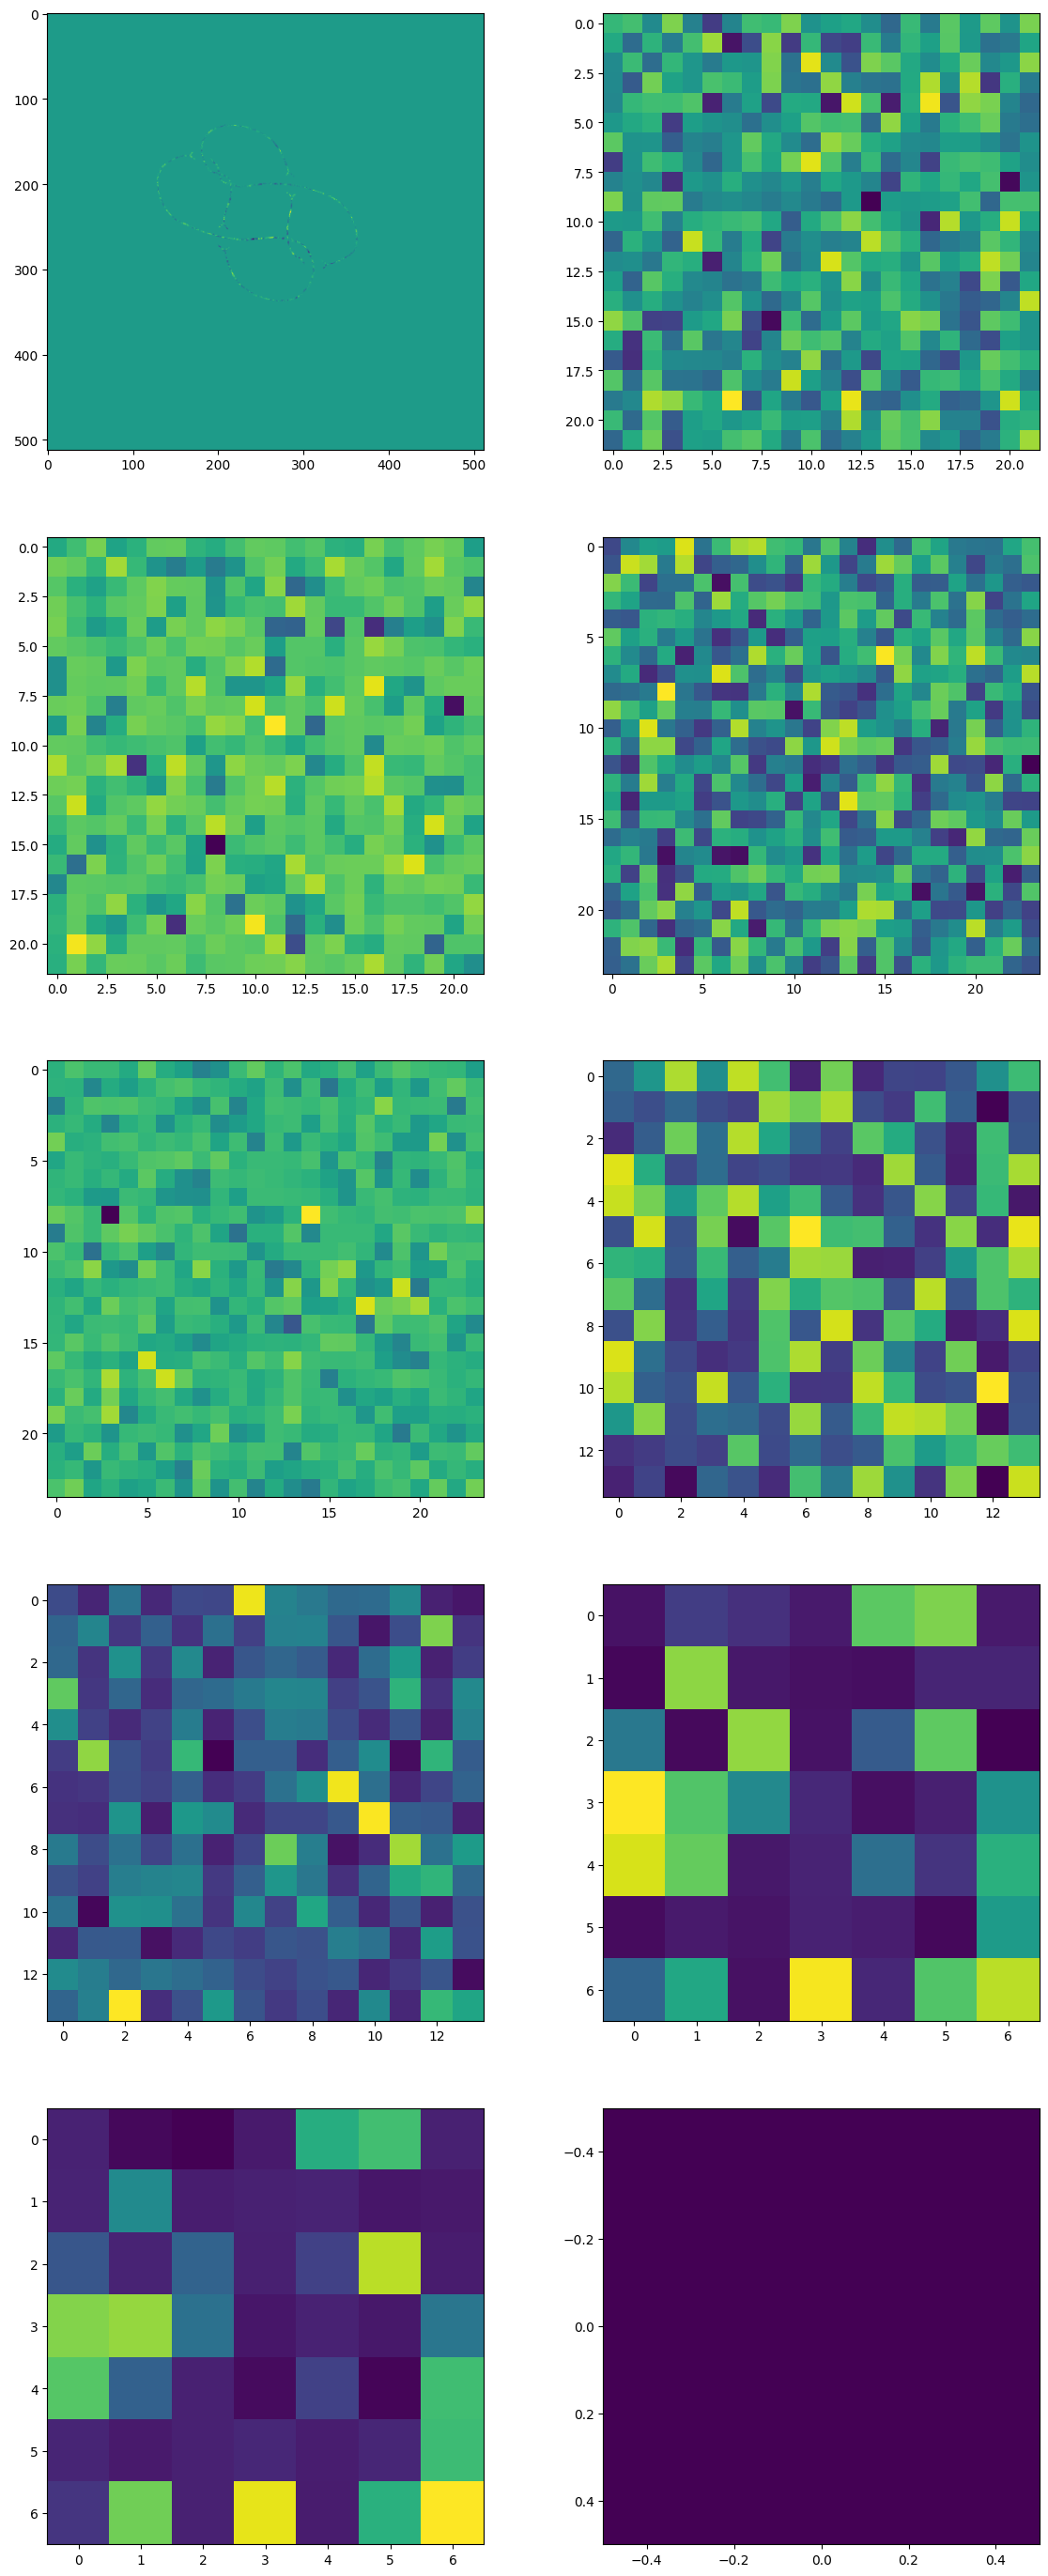

In [ ]:
plot_weights_image([model_1.layer_1[0], model_1.layer_2[0], model_1.layer_3[0], model_1.layer_4[0], model_1.layer_5[0]], 5, img)

### Evaluating and saving the model

In [ ]:
# Calculate model_1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                         )
model_1_results

{'model_name': 'KnotsModelVanila',
 'model_loss': 0.1512390524148941,
 'model_acc': 90.77857537272226}

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "Vanilla.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/Vanilla.pth


In [ ]:
# Instantiate a fresh instance of KnotsModelVanila
loaded_model_1 = KnotsModelVanila(
    input_shape=IMG_SIZE**2, # number of input features
    hidden_units_1=22**2,
    hidden_units_2=24**2,
    hidden_units_3=14**2,
    hidden_units_4=7**2,
    output_shape=1 # number of output classes desired
).to(device) # send model to GPU if it's available
next(loaded_model_1.parameters()).device # check model device

# Load model state dict
loaded_model_1.load_state_dict(torch.load(Path("models/Vanilla.pth")))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
KnotsModelVanila(
  (dropout): Dropout(p=0.9, inplace=False)
  (layer_prepare): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): BatchNorm1d(262144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer_1): Sequential(
    (0): Linear(in_features=262144, out_features=484, bias=True)
    (1): ELU(alpha=1.0)
    (2): BatchNorm1d(484, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer_2): Sequential(
    (0): Linear(in_features=484, out_features=576, bias=True)
    (1): ELU(alpha=1.0)
    (2): BatchNorm1d(576, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer_3): Sequential(
    (0): Linear(in_features=576, out_features=196, bias=True)
    (1): ELU(alpha=1.0)
    (2): BatchNorm1d(196, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer_4): Sequential(
    (0): Linear(in_features=196, out_features=49, bias=True)
    (1): ELU(alpha=1.0)
  )
  (layer_5): Sequential

In [ ]:
model_1 = loaded_model_1

In [ ]:
model_1_loaded_results = eval_model(model=loaded_model_1, data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                         )
model_1_loaded_results

{'model_name': 'KnotsModelVanila',
 'model_loss': 0.1512390524148941,
 'model_acc': 90.77857537272226}

## CNN

### Building a model

In [ ]:
from torch import nn

# Create a convolutional neural network
class KnotsModelCNN(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/

    To understand how it works, I highly recommend you go through the 'Convolutional Neural Networks' section at https://colah.github.io/ (of course, the other articles are very good too, so it's best to read them all!)
    """
    def __init__(self, hidden_units_conv: int, hidden_units_fc: int, output_shape: int):
        super().__init__()
ValueError: Unsupported nprocs (8). Please use nprocs=1 or None (default). If None, spawn will use all available devices. Use the environment variable
        self.conv = nn.Sequential(
          # layer_1
          nn.Conv2d(1, hidden_units_conv**2, kernel_size=15, stride=1, padding=1),
          nn.BatchNorm2d(hidden_units_conv**2),
          nn.ReLU(),

          nn.Conv2d(hidden_units_conv**2, hidden_units_conv**2, kernel_size=11, stride=1, padding=1),
          nn.BatchNorm2d(hidden_units_conv**2),
          nn.ReLU(),

          nn.MaxPool2d(kernel_size=4, stride=2),

          #layer_2
          nn.Conv2d(hidden_units_conv**2, (hidden_units_conv+2)**2, kernel_size=5, stride=1, padding=1),
          nn.BatchNorm2d((hidden_units_conv+2)**2),
          nn.ReLU(),

          nn.Conv2d((hidden_units_conv+2)**2, (hidden_units_conv+2)**2, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d((hidden_units_conv+2)**2),
          nn.ReLU(),

          nn.MaxPool2d(kernel_size=2, stride=2),

          #layer_3
          nn.Conv2d((hidden_units_conv+2)**2, (hidden_units_conv+4)**2, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d((hidden_units_conv+4)**2),
          nn.ReLU(),

          nn.Conv2d((hidden_units_conv+4)**2, (hidden_units_conv+4)**2, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d((hidden_units_conv+4)**2),
          nn.ReLU(),

          nn.Conv2d((hidden_units_conv+4)**2, (hidden_units_conv+4)**2, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d((hidden_units_conv+4)**2),
          nn.ReLU(),

          nn.MaxPool2d(kernel_size=2, stride=2),

          #layer_4
          nn.Conv2d((hidden_units_conv+4)**2, (hidden_units_conv+5)**2, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d((hidden_units_conv+5)**2),
          nn.ReLU(),

          nn.Conv2d((hidden_units_conv+5)**2, (hidden_units_conv+5)**2, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d((hidden_units_conv+5)**2),
          nn.ReLU(),

          nn.Conv2d((hidden_units_conv+5)**2, (hidden_units_conv+5)**2, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d((hidden_units_conv+5)**2),
          nn.ReLU(),

          nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d((hidden_units_conv+5)**2*(30)**2),

            nn.Dropout(0.5),
            nn.Linear(in_features=(hidden_units_conv+5)**2*(30)**2,
                      out_features=hidden_units_fc),
            nn.ELU(),

            nn.Linear(in_features=hidden_units_fc,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv(x)
        x = self.classifier(x)
        return x

In [ ]:
model_2 = KnotsModelCNN(hidden_units_conv=5,
                        hidden_units_fc=1024,
                        output_shape=1
                        ).to(device)

In [ ]:
model_2(train_features_batch.to(device))

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.70 GiB. GPU 0 has a total capacity of 14.74 GiB of which 2.50 GiB is free. Process 124822 has 12.24 GiB memory in use. Of the allocated memory 11.98 GiB is allocated by PyTorch, and 151.12 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
param_size = 0
for param in model_2.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model_2.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 45.476MB


In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                              lr=0.0003,
                              weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                        mode='min',
                                                        factor=0.2,
                                                        patience=7,
                                                        threshold=0.001,
                                                        verbose=True)

for i in range(20):
  train_step(model_2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.70 GiB. GPU 0 has a total capacity of 14.74 GiB of which 3.05 GiB is free. Process 70681 has 11.69 GiB memory in use. Of the allocated memory 11.43 GiB is allocated by PyTorch, and 145.30 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# let's try our model
from sklearn.model_selection import KFold #https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-pytorch.md
from torch.utils.data import SubsetRandomSampler
from helper_functions import accuracy_fn

EPOCHS = 5
BATCH_SIZE = 64
N_SPLITS = 2
best_acc = 0
best_fold = 0
SAVE_PATH = 'content/saved_models'

try:
  os.mkdir(SAVE_PATH)
except:
  pass

train_losses, train_accuracies = [[] for i in range(N_SPLITS)], [[] for i in range(N_SPLITS)]
valid_losses, valid_accuracies = [[] for i in range(N_SPLITS)], [[] for i in range(N_SPLITS)]

y_pred_train, y_target_train = [[] for i in range(N_SPLITS)], [[] for i in range(N_SPLITS)]
y_pred_valid, y_target_valid = [[] for i in range(N_SPLITS)], [[] for i in range(N_SPLITS)]

kfold = KFold(n_splits=N_SPLITS, shuffle=True)

for fold, (train_idx, valid_idx) in tqdmn(enumerate(kfold.split(data))):
  print(f'Fold {fold+1}')
  print('--------------')

  train_dataloader = DataLoader(dataset=data,
                                batch_size=BATCH_SIZE,
                                sampler=SubsetRandomSampler(train_idx),
                                num_workers=2,
                                pin_memory=True)

  valid_dataloader = DataLoader(dataset=data,
                                batch_size=BATCH_SIZE,
                                sampler=SubsetRandomSampler(valid_idx),
                                num_workers=2,
                                pin_memory=True)

  model_2 = KnotsModelCNN(hidden_units_fc=1024,
                          output_shape=1
                         ).to(device)
  loss_fn = nn.MSELoss()
  optimizer = torch.optim.Adam(params=model_2.parameters(),
                               lr=0.0003,
                               weight_decay=0.0001)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                         mode='min',
                                                         factor=0.2,
                                                         patience=7,
                                                         threshold=0.001,
                                                         verbose=True)

  for epoch in tqdm.tqdm(range(EPOCHS)):
    print(f'\nEpoch: {epoch+1}')

    y_pred_train_fold, y_target_train_fold, train_loss, train_acc = train_step(data_loader=train_dataloader,
                                                                               model=model_2,
                                                                               loss_fn=loss_fn,
                                                                               optimizer=optimizer,
                                                                               accuracy_fn=accuracy_fn,
                                                                              )
    y_pred_train[fold] = y_pred_train_fold; y_target_train[fold] = y_target_train_fold
    train_losses[fold].append(train_loss); train_accuracies[fold].append(train_acc)

    y_pred_valid_fold, y_target_valid_fold, valid_loss, valid_acc = test_step(data_loader=valid_dataloader,
                                                                              model=model_2,
                                                                              loss_fn=loss_fn,
                                                                              accuracy_fn=accuracy_fn,
                                                                              scheduler=scheduler,
                                                                              save_path=SAVE_PATH
                                                                             )
    y_pred_valid[fold] = y_pred_valid_fold; y_target_valid[fold] = y_target_valid_fold
    valid_losses[fold].append(valid_loss); valid_accuracies[fold].append(valid_acc)

0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Fold 1
--------------



  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 1


  0%|          | 0/5 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.70 GiB. GPU 0 has a total capacity of 14.74 GiB of which 3.09 GiB is free. Process 20235 has 11.65 GiB memory in use. Of the allocated memory 11.39 GiB is allocated by PyTorch, and 145.68 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
model_2 = KnotsModelCNN(hidden_units_fc=1024,
                        output_shape=len(data.classes)
                       ).to(device)

model_2.load_state_dict(torch.load(SAVE_PATH + f'{model_2.__class__.__name__}_best.pth', weights_only=True))

In [ ]:
def count_parameters(model): return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model_2)

1981190

In [ ]:
train_losses = train_losses[fold]; train_accuracies = train_accuracies[fold]
valid_losses = valid_losses[fold]; valid_accuracies = valid_accuracies[fold]
y_pred_train = y_pred_train[fold]; y_target_train = y_target_train[fold]
y_pred_valid = y_pred_valid[fold]; y_target_valid = y_target_valid[fold]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.title(f"Loss on {folder+1}th folder")

plt.plot(range(EPOCHS-3), train_losses[3:], label="Train", linewidth=2)
plt.plot(range(EPOCHS-3), valid_losses[3:], label="Validation", linewidth=2)

plt.legend()
plt.xlabel("Epoch")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.title("Accuracy")

plt.plot(range(epochs), train_accuracies, label="Train", linewidth=2)
plt.plot(range(epochs), valid_accuracies, label="Test", linewidth=2)

plt.legend()
plt.xlabel("Epoch")
plt.show()

### Plotting confusion matrixes

In [ ]:
import sklearn.metrics

In [ ]:
conf_matrix_train = sklearn.metrics.confusion_matrix(y_target_train, y_pred_train, labels=list(range(0, len(data.classes))))

conf_matrix_train

array([[826,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 828,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 799,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 817,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 803,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 826,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 703,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 825,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 813]])

In [ ]:
conf_matrix_test = sklearn.metrics.confusion_matrix(y_target_valid, y_pred_valid, labels=list(range(0, len(data.classes))))

conf_matrix_valid

array([[197,   5,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3, 180,  14,   3,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0, 229,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 191,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 192,   8,   1,   2,   1],
       [  0,   0,   0,   0,   0,   0,   1, 200,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2, 176,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  14, 190,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  15, 177]])

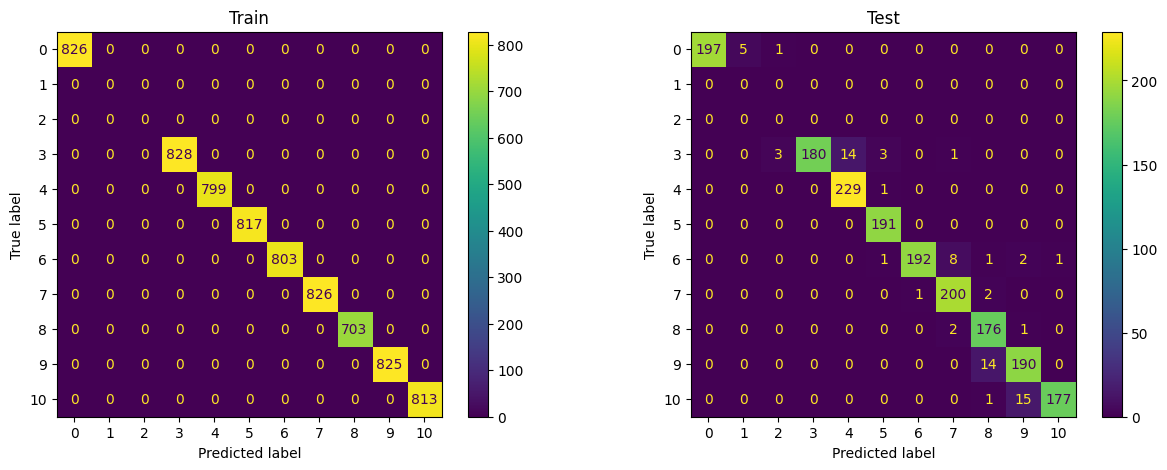

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.set_title("Train")
ax2.set_title("Validation")

sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train).plot(ax=ax1)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_valid).plot(ax=ax2)

### Plot weights

In [ ]:
model_2

KnotsModelCNN(
  (block_1): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

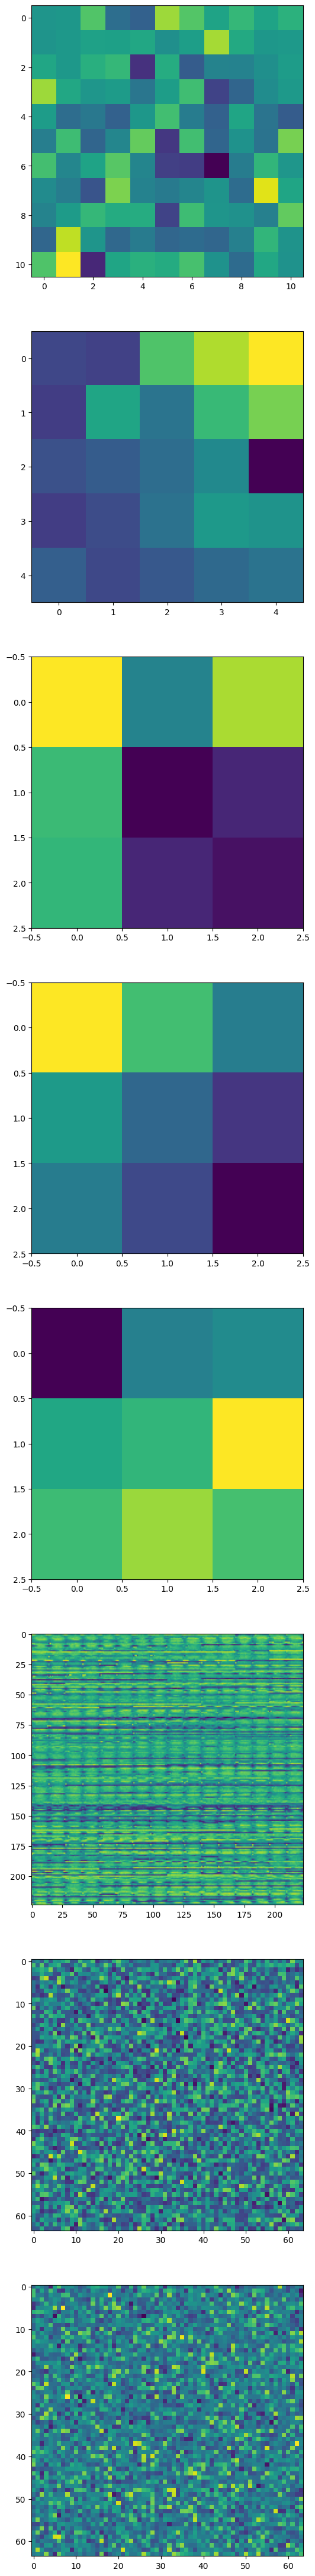

In [ ]:
plot_weights([model_2.block_1[0], model_2.block_1[4], model_2.block_1[8], model_2.block_1[11], model_2.block_1[14], model_2.classifier[3], model_2.classifier[7], model_2.classifier[9]])

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

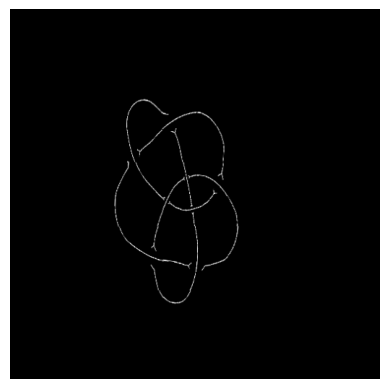

In [ ]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img = train_features_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("Off")

In [ ]:
func = []
to_be_shown = (torch.nn.modules.linear.Linear, torch.nn.modules.Conv2d)
func_l = 0

for name, module in model_2.named_modules():
  l = len(name.split('.'))
  if l >= 2:
    func.append(module)
    if type(module) in to_be_shown:
      func_l += 1

func, func_l

([Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4)),
  BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
  ReLU(),
  MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
  Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
  BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
  ReLU(),
  MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
  Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
  ReLU(),
  Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
  ReLU(),
  Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
  ReLU(),
  MaxPool2d(kernel_size=3, stride=2, p

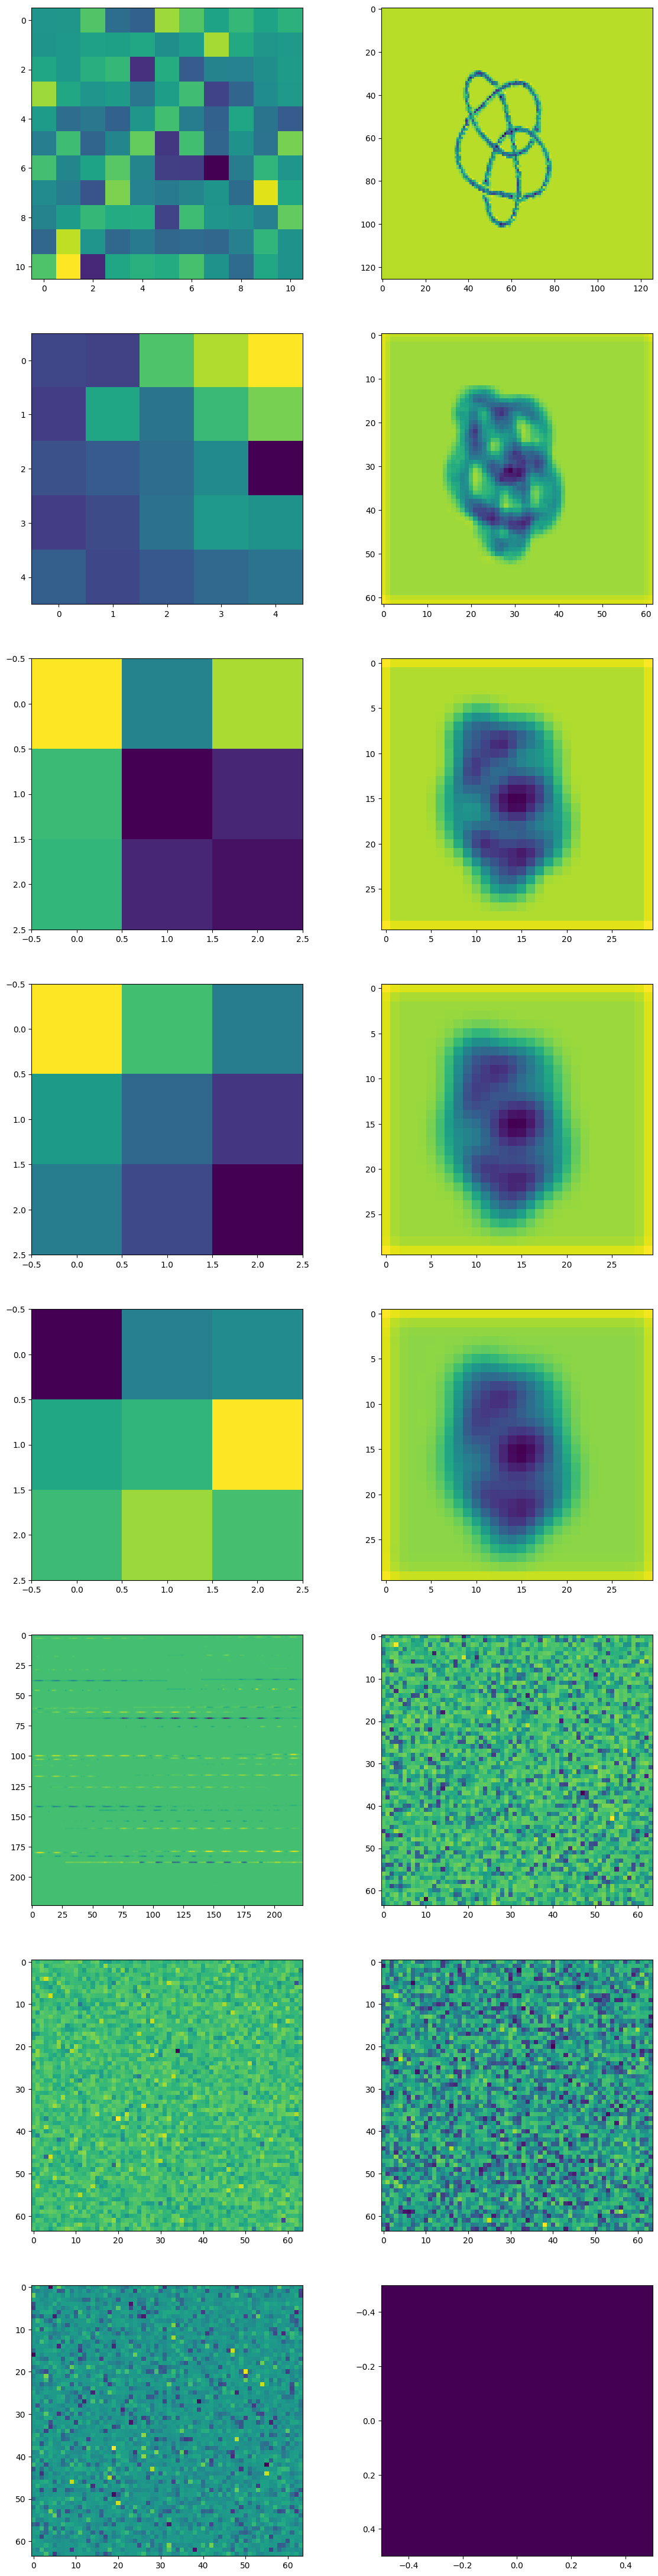

In [ ]:
plot_weights_image(func, func_l, img)

### Evaluating and saving the model

In [ ]:
# Calculate model_1 results with device-agnostic code
model_2_results = eval_model(model=model_2, data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                         )
model_2_results

{'model_name': 'KnotsModelCNN',
 'model_loss': 0.022921135649085045,
 'model_acc': 99.28216454997239}

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "CNN.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/CNN.pth


In [ ]:
# Instantiate a fresh instance of KnotsModelVanila
loaded_model_2 = KnotsModelCNN(
                        input_channels_shape=1,
                        input_image_shape=IMG_SIZE**2,
                        hidden_units_conv=16,
                        hidden_units_fc=4096,
                        output_shape=1
                        ).to(device) # send model to GPU if it's available
next(loaded_model_2.parameters()).device # check model device

# Load model state dict
loaded_model_2.load_state_dict(torch.load(Path("models/CNN.pth")))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_2.to(device)

print(f"Loaded model:\n{loaded_model_2}")
print(f"Model on device:\n{next(loaded_model_2.parameters()).device}")

Loaded model:
KnotsModelCNN(
  (block_1): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1),

In [ ]:
model_2 = loaded_model_2

In [ ]:
model_2_loaded_results = eval_model(model=loaded_model_2, data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                         )
model_2_loaded_results

{'model_name': 'KnotsModelCNN',
 'model_loss': 0.01873341016471386,
 'model_acc': 99.83434566537825}

# Rating the models

In [ ]:
shutil.rmtree('./content')

FileNotFoundError: [Errno 2] No such file or directory: './content'

In [ ]:
# extract .zip
try:
  shutil.rmtree("/content/test_knots")
except Exception as e:
  pass

# get all .zip files from local storage
files = glob.glob('*.zip')

# if 2 or more files occured, we don't know which we want to extract
if len(files) > 1:
  print("Don't know which archive to unpack")
else:
  # unpack .zip
  with zipfile.ZipFile(f"/content/{files[0]}","r") as zip_ref:
      zip_ref.extractall("/content")

In [ ]:
# we use torchvision.datasets.ImageFolder class to divide our data into classes and work with them efficiently
# useful links: https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
#
#               https://debuggercafe.com/pytorch-imagefolder-for-training-cnn-models/

data_transform = v2.Compose([v2.Grayscale(num_output_channels=1),
                             v2.ToImage(),
                             v2.ToDtype(torch.float32, scale=True),
                             v2.functional.invert])



valid_data = CustomImageFolder(root='/content/content/test_knots_512',
                         transform=data_transform)

In [ ]:
valid_dataloader = DataLoader(valid_data)

In [ ]:
eval_model(model=model_2, data_loader=valid_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)